In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fm=tf.keras.datasets.fashion_mnist

In [ ]:
(xtr,ytr),(xtst,ytst)=fm.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
cn=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
#Scale the image
xtr=xtr.reshape(xtr.shape[0],28,28,1)
xtst=xtst.reshape(xtst.shape[0],28,28,1)

xtr=xtr/255.0
xtst=xtst/255.0

In [ ]:
#Now implement CNN
CnnModel=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1)),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Conv2D(32,(3,3)),
tf.keras.layers.MaxPool2D((2,2)),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(100,activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(60,activation='relu'),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(10,activation='Softmax')])

# New Section

In [ ]:
#Compile This model
CnnModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [ ]:
#history=CnnModel.fit(xtr,tf.keras.utils.to_categorical(ytr),epochs=5,validation_split=0.25,callbacks=[early_stopping])
history=CnnModel.fit(xtr,tf.keras.utils.to_categorical(ytr),epochs=5,validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 34s 24ms/step - loss: 0.4693 - accuracy: 0.8247 - val_loss: 0.4188 - val_accuracy: 0.8432
Epoch 2/5
1407/1407 [==============================] - 34s 24ms/step - loss: 0.4243 - accuracy: 0.8439 - val_loss: 0.3805 - val_accuracy: 0.8589
Epoch 3/5
1407/1407 [==============================] - 34s 24ms/step - loss: 0.3943 - accuracy: 0.8556 - val_loss: 0.3780 - val_accuracy: 0.8616
Epoch 4/5
1407/1407 [==============================] - 34s 24ms/step - loss: 0.3726 - accuracy: 0.8640 - val_loss: 0.3526 - val_accuracy: 0.8711
Epoch 5/5
1407/1407 [==============================] - 34s 24ms/step - loss: 0.3556 - accuracy: 0.8689 - val_loss: 0.3488 - val_accuracy: 0.8715


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

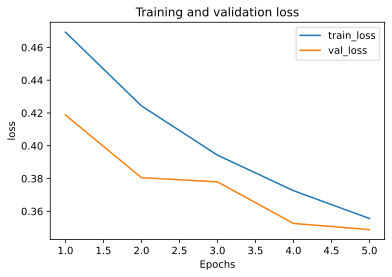

In [ ]:
plot_metric(history, 'loss')

In [ ]:
y_pred=CnnModel.predict(xtst)

In [ ]:
i=150
ClassLabel=np.argmax(y_pred[i])
print(cn[ClassLabel])
print(cn[ytst[i]])

Pullover
Coat
